In [5]:
from skimage import data
from matplotlib import pyplot as plt
from skimage.feature import draw_multiblock_lbp
from skimage.feature import multiblock_lbp
from numpy.testing import assert_equal
from skimage.transform import integral_image
import numpy as np
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

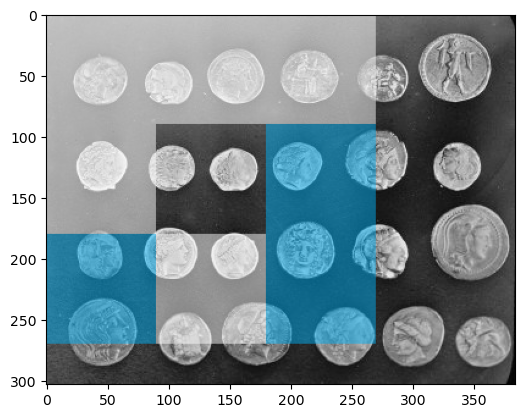

In [2]:
test_img = data.coins()

int_img = integral_image(test_img)

lbp_code = multiblock_lbp(int_img, 0, 0, 90, 90)

img = draw_multiblock_lbp(test_img, 0, 0, 90, 90, lbp_code=lbp_code, alpha=0.5)


plt.imshow(img)

plt.show()

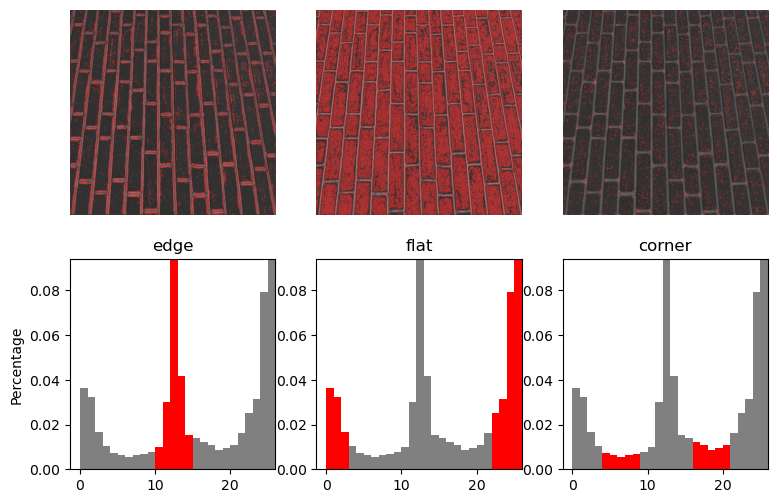

In [6]:
# settings for LBP
radius = 3
n_points = 8 * radius


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor("r")


image = data.brick()
lbp = local_binary_pattern(image, n_points, radius, method="uniform")


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(
        lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor="0.5"
    )


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ("edge", "flat", "corner")
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4  # 1/4th of the histogram
i_34 = 3 * (n_points // 4)  # 3/4th of the histogram
corner_labels = list(range(i_14 - w, i_14 + w + 1)) + list(
    range(i_34 - w, i_34 + w + 1)
)

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel("Percentage")
for ax in ax_img:
    ax.axis("off")

plt.show()